/tmp/ipykernel_126319/3510331864.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_rate_data = combined_data.groupby(['grid_size', 'num_agents']).apply(
/tmp/ipykernel_126319/3510331864.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_rewards_data = combined_data.groupby(['grid_size', 'num_agents']).apply(
/tmp/ipykernel_126319/3510331864.py:52: DeprecationWarning: DataFrameGroupBy.ap

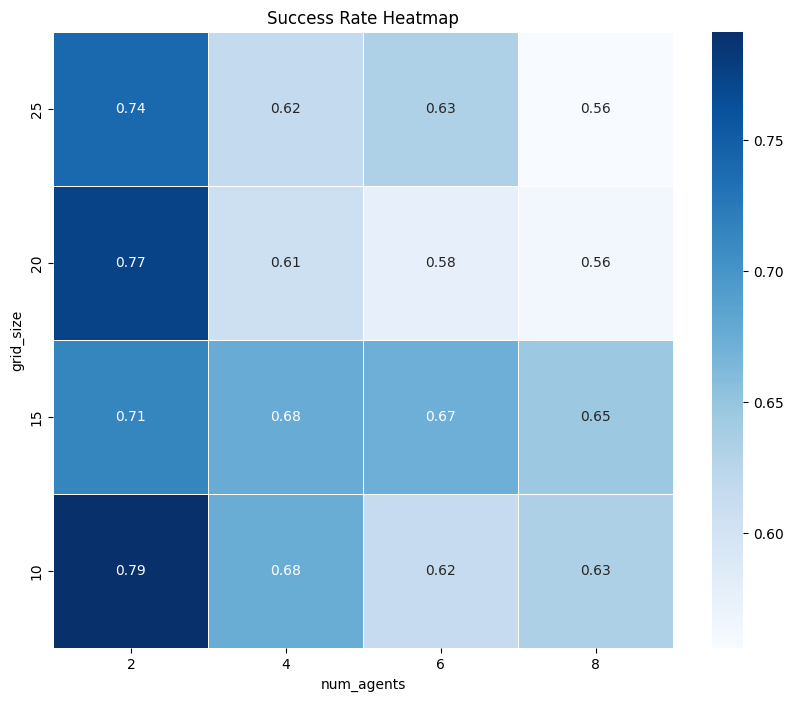

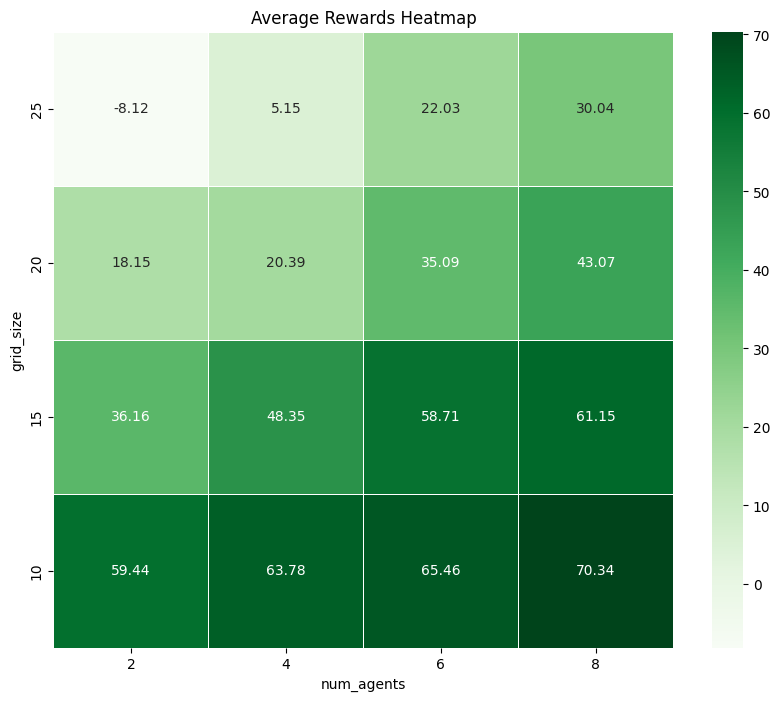

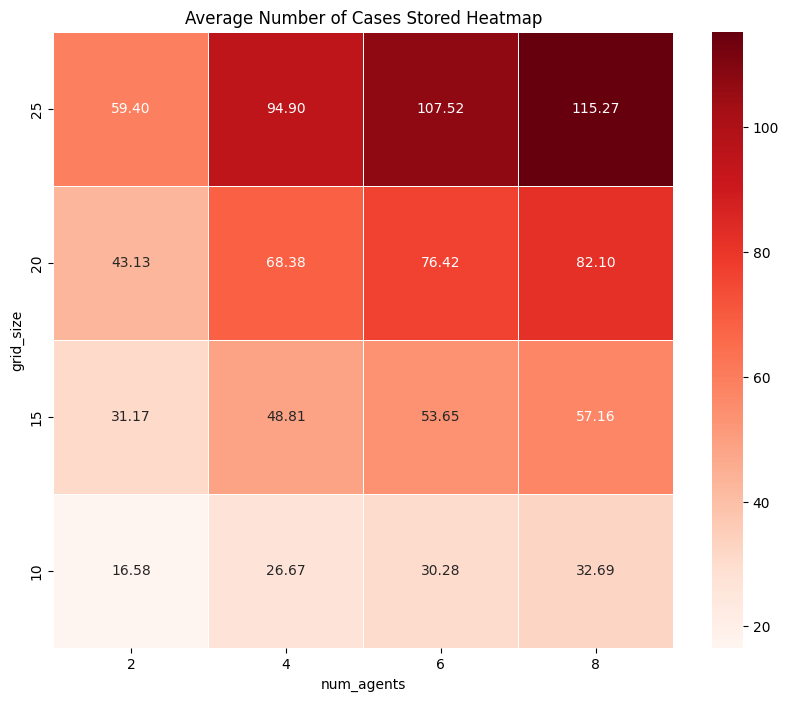

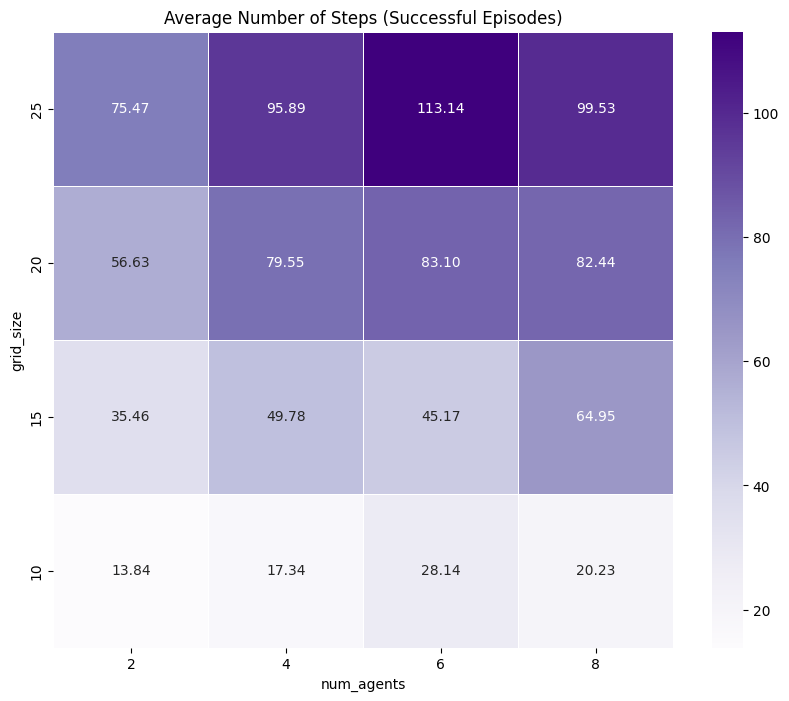

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Folder path containing updated CSV files
folder_path = './d-ga-comm2-updated/'

# Variable to control how many episodes to average together
episodes_per_average = 1

# Initialize an empty list to hold data from all files
all_data_frames = []

# Loop through all CSV files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Load the data from the CSV file and append to the list
        df = pd.read_csv(file_path)
        df['filename'] = filename  # Add a filename column to keep track of source
        all_data_frames.append(df)

# If no CSV files are found, exit without generating the graph
if len(all_data_frames) == 0:
    print("No CSV files found in the specified folder.")
else:
    # Concatenate all data frames into a single data frame
    combined_data = pd.concat(all_data_frames, ignore_index=True)

    # Set total steps to 0 for non-successful episodes
    combined_data.loc[combined_data['eps_status'] == 0, 'total_steps'] = 0

    # Create a new column for grouping episodes in batches
    combined_data['eps_group'] = (combined_data['eps'] // episodes_per_average) * episodes_per_average

    # Get sorted values for num_agents and grid_size
    sorted_num_agents = sorted(combined_data['num_agents'].unique())
    sorted_grid_size = sorted(combined_data['grid_size'].unique(), reverse=True)  # Bottom-to-top for y-axis

    # Heatmap 1: Success Rate
    success_rate_data = combined_data.groupby(['grid_size', 'num_agents']).apply(
        lambda x: (x['eps_status'].sum() / len(x))
    ).unstack(fill_value=0).reindex(index=sorted_grid_size, columns=sorted_num_agents)

    # Heatmap 2: Average Rewards (now using 'rewards_agents')
    average_rewards_data = combined_data.groupby(['grid_size', 'num_agents']).apply(
        lambda x: x['rewards_agents'].mean()
    ).unstack(fill_value=0).reindex(index=sorted_grid_size, columns=sorted_num_agents)

    # Heatmap 3: Average Cases Stored (now using 'total_case_agents')
    average_cases_data = combined_data.groupby(['grid_size', 'num_agents']).apply(
        lambda x: x['total_case_agents'].mean()
    ).unstack(fill_value=0).reindex(index=sorted_grid_size, columns=sorted_num_agents)

    # Heatmap: Average Number of Steps (only for successful episodes, eps_status = 1)
    average_steps_data = combined_data[combined_data['eps_status'] == 1].groupby(['grid_size', 'num_agents']).apply(
        lambda x: x['total_steps'].mean()
    ).unstack(fill_value=0).reindex(index=sorted_grid_size, columns=sorted_num_agents)

    # First heatmap: Success rate
    plt.figure(figsize=(10, 8))
    sns.heatmap(success_rate_data, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5,
                xticklabels=sorted_num_agents, yticklabels=sorted_grid_size)
    plt.title("Success Rate Heatmap")
    plt.xlabel("num_agents")
    plt.ylabel("grid_size")
    plt.show()

    # Second heatmap: Average rewards
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_rewards_data, cmap='Greens', annot=True, fmt=".2f", linewidths=0.5,
                xticklabels=sorted_num_agents, yticklabels=sorted_grid_size)
    plt.title("Average Rewards Heatmap")
    plt.xlabel("num_agents")
    plt.ylabel("grid_size")
    plt.show()

    # Third heatmap: Average number of cases stored
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_cases_data, cmap='Reds', annot=True, fmt=".2f", linewidths=0.5,
                xticklabels=sorted_num_agents, yticklabels=sorted_grid_size)
    plt.title("Average Number of Cases Stored Heatmap")
    plt.xlabel("num_agents")
    plt.ylabel("grid_size")
    plt.show()

    # Fourth heatmap: Average number of steps (only for successful episodes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_steps_data, cmap='Purples', annot=True, fmt=".2f", linewidths=0.5,
                xticklabels=sorted_num_agents, yticklabels=sorted_grid_size)
    plt.title("Average Number of Steps (Successful Episodes)")
    plt.xlabel("num_agents")
    plt.ylabel("grid_size")
    plt.show()
